<a href="https://colab.research.google.com/github/sidhanth123/Wine-Quality/blob/main/AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('/content/wine_quality_41.csv')

In [20]:
from google.colab import drive
drive.mount('/content/drive')

df.to_csv('/content/wine_quality_41.csv', index = False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.12,0.79,0.33,2.51,0.029,25,22,1.00038,3.07,1.43,12.53,7
1,14.46,0.15,0.06,4.23,0.169,18,177,0.99845,3.06,0.99,8.62,8
2,12.05,1.37,0.31,7.14,0.072,66,225,0.99913,3.15,0.77,13.42,5
3,10.59,0.46,0.33,12.84,0.047,54,163,1.00035,3.45,1.07,11.03,7
4,5.72,1.03,0.73,13.47,0.020,35,51,1.00157,3.61,0.85,12.96,3


In [23]:
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,8.930000,0.795854,0.500732,7.750488,0.106854,37.195122,148.926829,0.996200,3.328049,0.943415,10.970000,5.756098
std,3.262553,0.442809,0.286316,4.133269,0.057079,19.369073,86.455593,0.003759,0.267144,0.374484,1.856942,1.655000
min,4.230000,0.110000,0.030000,1.000000,0.015000,4.000000,11.000000,0.990330,2.910000,0.320000,8.070000,3.000000
25%,6.000000,0.380000,0.290000,4.430000,0.055000,21.000000,63.000000,0.993520,3.070000,0.640000,8.860000,5.000000
50%,8.750000,0.830000,0.510000,7.140000,0.116000,33.000000,160.000000,0.996790,3.370000,0.990000,11.030000,6.000000
75%,11.530000,1.190000,0.760000,10.710000,0.159000,54.000000,225.000000,0.999130,3.540000,1.270000,12.570000,7.000000
max,14.670000,1.480000,0.930000,15.290000,0.188000,69.000000,286.000000,1.002690,3.850000,1.490000,13.700000,8.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         41 non-null     float64
 1   volatile acidity      41 non-null     float64
 2   citric acid           41 non-null     float64
 3   residual sugar        41 non-null     float64
 4   chlorides             41 non-null     float64
 5   free sulfur dioxide   41 non-null     int64  
 6   total sulfur dioxide  41 non-null     int64  
 7   density               41 non-null     float64
 8   pH                    41 non-null     float64
 9   sulphates             41 non-null     float64
 10  alcohol               41 non-null     float64
 11  quality               41 non-null     int64  
dtypes: float64(9), int64(3)
memory usage: 4.0 KB


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
X = df.drop('quality', axis=1)
y = df['quality']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.1989322625929995
Mean Squared Error: 6.167490094933355
Root Mean Squared Error: 2.4834431934178314


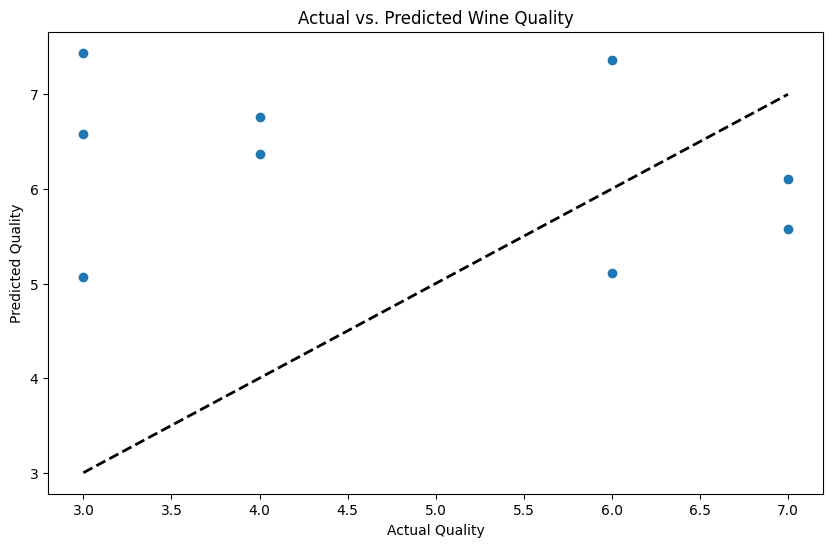

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs. Predicted Wine Quality")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

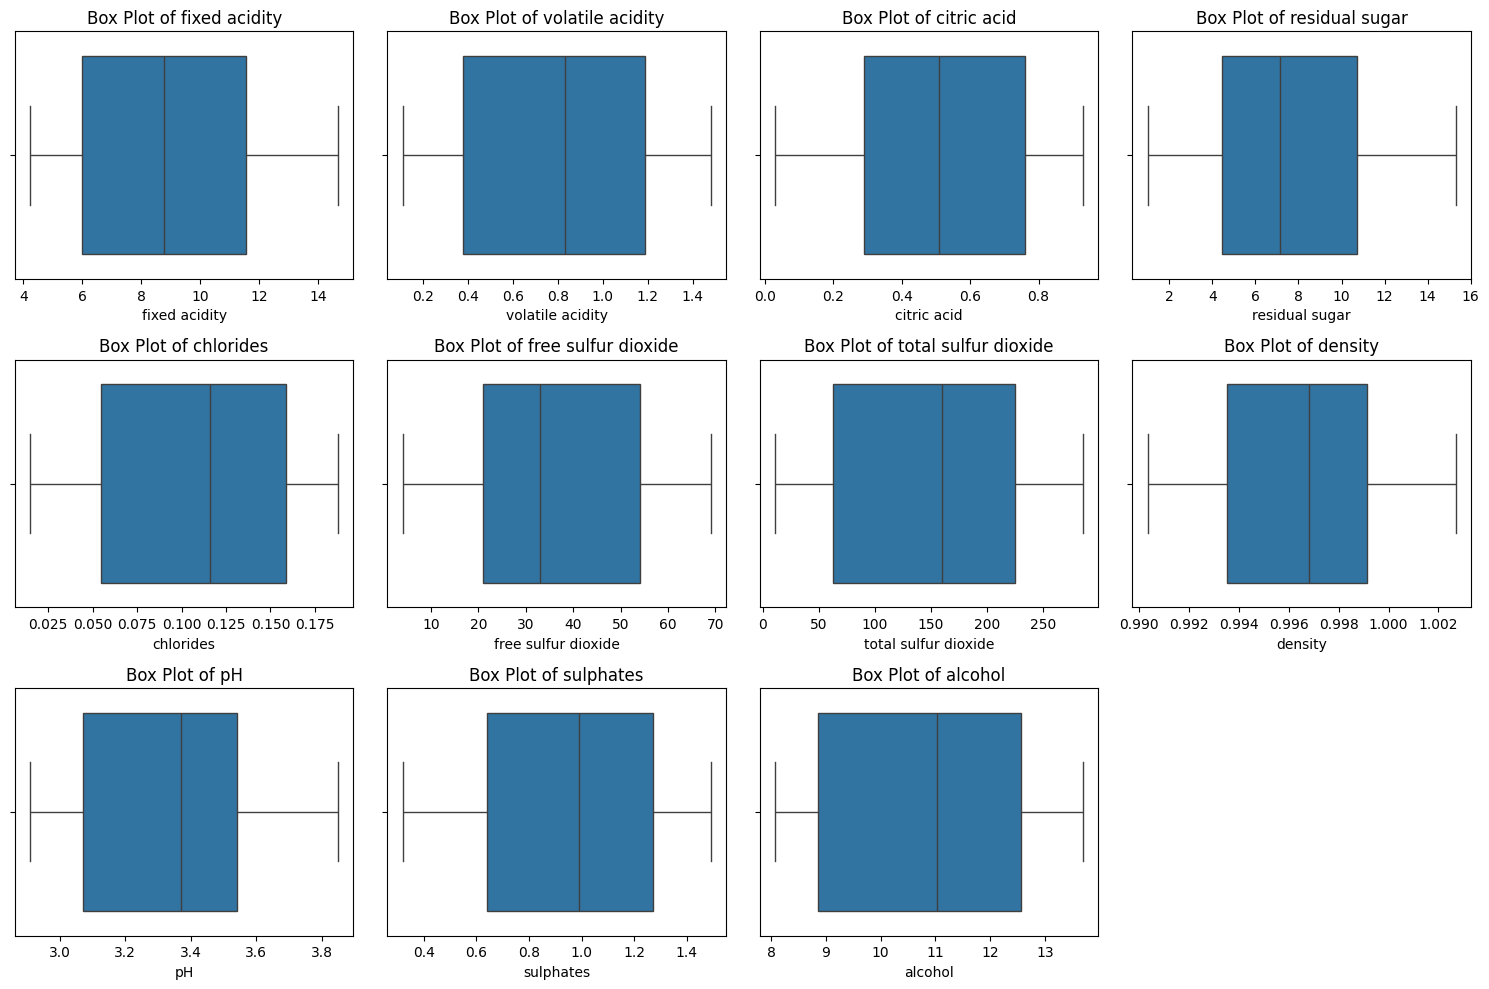

In [28]:
columns_to_plot = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                   'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                   'pH', 'sulphates', 'alcohol']

plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_plot):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()